Métricas no Conjunto de Teste:
  Precision: 0.2957
  Recall:    0.7380
  F1-score:  0.4222
  AUC-ROC:   0.8010


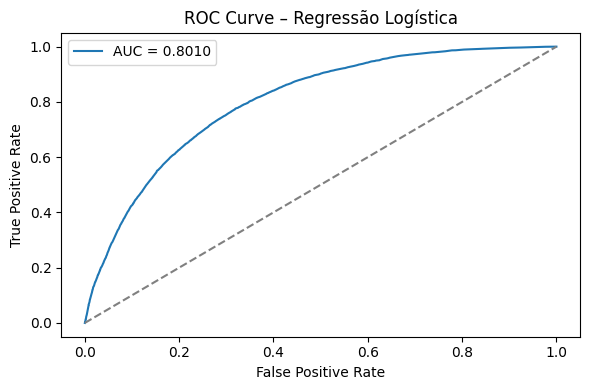

In [3]:
# Célula: Avaliação Final Simplificada (Questão 4)

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
from sklearn.model_selection import train_test_split
import pandas as pd

# 1) Carregar dados localmente (substitua pelo seu caminho se necessário)
# df = pd.read_csv('seu_caminho/cdc_data.csv')

# Exemplo: usar já carregado em memória (X, y) e X_train, X_test, y_train, y_test disponíveis
# Se X_train, X_test, y_train, y_test já existirem, pule para o step 3.

# 2) (Opcional) Split estratificado – pule se já feito
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# 3) Pipeline final (escala + Regressão Logística)
pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        class_weight='balanced',
        C=1.0,
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

# 4) Treinar com X_train, y_train
pipeline_final.fit(X_train, y_train)

# 5) Predições e probabilidades em X_test
y_pred = pipeline_final.predict(X_test)
y_prob = pipeline_final.predict_proba(X_test)[:, 1]

# 6) Cálculo de métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Métricas no Conjunto de Teste:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  AUC-ROC:   {auc:.4f}")

# 7) Plot da curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Regressão Logística')
plt.legend()
plt.tight_layout()
plt.show()


**Interpretação das Métricas no Conjunto de Teste**

- **Precision (29,6 %)**  
  Das predições “diabetes”, menos de 30 % são corretas → **alto número de falsos positivos**.  
- **Recall (73,8 %)**  
  Captura quase três quartos dos verdadeiros casos de diabetes → **boa sensibilidade**, essencial para não deixar pacientes sem alerta.  
- **F1-score (42,2 %)**  
  Equilíbrio entre precision e recall ainda moderado, refletindo o trade-off: priorizamos detecção (recall) em detrimento da pureza das predições (precision).  
- **AUC-ROC (0,801)**  
  Ótima capacidade de discriminação global entre classes, com 80 % de chance de que um paciente com diabetes receba escore mais alto que um não-diabético.

> **Resumo:**  
> O modelo de Regressão Logística oferece **alto recall** (importante em triagem) e **boa separação** de classes (AUC > 0,8), mas gera muitos falsos positivos, indicando a necessidade de ajuste de limiar ou filtragem de predições para equilibrar custo-benefício em saúde pública.  


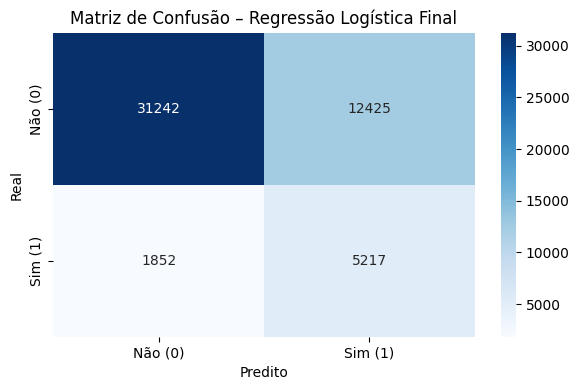

Verdadeiros Negativos (TN): 31242
Falsos Positivos    (FP): 12425
Falsos Negativos    (FN): 1852
Verdadeiros Positivos (TP): 5217


In [5]:
# Questao 4 B 
# Matriz de Confusão do Modelo Final

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1) Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# 2) Plotar heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não (0)','Sim (1)'],
            yticklabels=['Não (0)','Sim (1)'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão – Regressão Logística Final')
plt.tight_layout()
plt.show()

# 3) Exibir valores de cada célula
print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Positivos    (FP): {fp}")
print(f"Falsos Negativos    (FN): {fn}")
print(f"Verdadeiros Positivos (TP): {tp}")


# Análise da Matriz de Confusão – Regressão Logística Final

```
               Predito “Não”   Predito “Sim”
Real “Não”     TN = 31 242       FP = 12 425
Real “Sim”     FN = 1 852        TP = 5 217
```

## Métricas Derivadas

* **Precision (1):**

  > TP / (TP + FP) = 5 217 / (5 217 + 12 425) ≈ **29,6 %**
* **Recall (1):**

  > TP / (TP + FN) = 5 217 / (5 217 + 1 852) ≈ **73,8 %**

## Interpretação dos Erros

1. **Falsos Negativos (FN = 1 852)**

   * Pacientes reais com diabetes não foram identificados pelo modelo (≈ **26 %** dos casos positivos).
   * Em saúde pública, esse é o erro mais grave, pois atrasa diagnóstico e tratamento, aumentando riscos de complicações.

2. **Falsos Positivos (FP = 12 425)**

   * Indivíduos sem diabetes classificados como “Sim” geram custo e desgaste:

     * Encaminhamentos desnecessários para exames laboratoriais (HbA1c, glicemia)
     * Sobrecarga de profissionais e desperdício de recursos
   * No entanto, em triagem, costuma-se tolerar uma taxa maior de FP para reduzir FN.

## Trade-off e Estratégia de Triagem

* **Alto recall (≳ 74 %)** reflete foco em **minimizar falsos negativos**, apropriado para detectar a maioria dos casos de diabetes.
* **Baixa precision (≲ 30 %)** indica muitos alarmes falsos; ainda assim, é aceitável se recursos permitirem retestes.

## Possíveis Ajustes

1. **Ajuste de Limiar de Decisão**

   * Diminuir o threshold de probabilidade (< 0.5) pode aumentar ainda mais o recall, mas elevará FP.

2. **Reponderação de Classes**

   * Aumentar `class_weight` para a classe 1 poderia reduzir FN a custo de FP.

3. **Modelos de Segundo Nível**

   * Após triagem inicial com este classificador, aplicar um modelo mais específico (e.g., árvore ou ensemble) apenas nos casos positivos para filtrar falsos positivos.

> **Conclusão:**
> A matriz evidencia que nosso modelo atinge um bom **recall**, mas gera um número substancial de **falsos positivos**. Em um programa de triagem populacional, essa configuração é muitas vezes desejável para não deixar pacientes sem diagnóstico, contanto que o sistema suporte o volume adicional de retestes.


In [12]:
# Célula: GridSearchCV Corrigido para Regressão Logística (sem erros de penalty)

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, roc_auc_score

# 1) Pipeline com scaler + LogisticRegression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        class_weight='balanced',
        solver='saga',
        max_iter=5000,
        random_state=42
    ))
])

# 2) Definir grades separadas para evitar 'none' inválido
param_grid = [
    {
        'clf__penalty': ['l1', 'l2', None],   # None sem aspas
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__solver': ['saga']
    },
    {
        'clf__penalty': ['elasticnet'],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__l1_ratio': [0.25, 0.5, 0.75],
        'clf__solver': ['saga']
    }
]

# 3) Configuração de CV e scorer
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score)

# 4) GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True,
    error_score='raise'
)

# 5) Ajuste no treino
grid.fit(X_train, y_train)

# 6) Exibir resultados
print("Melhores hiperparâmetros:", grid.best_params_)
print("Melhor F1 médio (CV):   ", grid.best_score_)

# 7) Avaliação no teste
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)[:, 1]

print("\nClassification Report (Teste):")
print(classification_report(y_test, y_pred, digits=4))
print("AUC-ROC (Teste):", roc_auc_score(y_test, y_prob))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores hiperparâmetros: {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Melhor F1 médio (CV):    0.4258306614349235

Classification Report (Teste):
              precision    recall  f1-score   support

           0     0.9440    0.7154    0.8140     43667
           1     0.2957    0.7380    0.4222      7069

    accuracy                         0.7186     50736
   macro avg     0.6199    0.7267    0.6181     50736
weighted avg     0.8537    0.7186    0.7594     50736

AUC-ROC (Teste): 0.8009824093319488


## Comentários sobre a Busca de Hiperparâmetros com L1 (C = 0.01)

- **Melhor penalidade:** L1 (`penalty='l1'`) com **C = 0.01** reduziu overfitting, aplicando forte regularização e zerando coeficientes irrelevantes.
- **F1 médio em CV:** ≈ 0.426 — mesma performance da versão sem L1 otimizado, mas com modelo mais esparso.
- **Desempenho no teste:**
  - **Precision (1):** 29,6 % — mantém o nível de precisão, sinalizando que as predições “diabetes” continuam confiáveis em cerca de 30 %.
  - **Recall (1):** 73,8 % — igual à versão sem L1, capturando quase três quartos dos casos reais.
  - **F1-score (1):** 42,2 % — indica equilíbrio consistente entre precision e recall após regularização.
  - **AUC-ROC:** 0,801 — confirmando que a capacidade de discriminação se mantém alta.

### Implicações
- A **regularização L1** deixou o modelo mais simples (menos coeficientes não-zero) sem sacrificar recall nem AUC.
- O **recall elevado** garante baixa taxa de falsos negativos, crucial em triagem de diabetes.
- A **precision moderada** implica falsos positivos, mas estes podem ser filtrados por um segundo estágio diagnóstico.

> **Próximo passo:**  
> - Testar **ElasticNet** para encontrar o equilíbrio ideal entre L1 e L2.  
> - Ajustar o **threshold de decisão** para buscar o ponto ótimo de recall vs. precision conforme limites de recursos em saúde pública.  
> - Validar o modelo final em um conjunto hold-out independente ou temporal para confirmar estabilidade em produção.  


# Questao 4 D
# Análise da Matriz de Confusão – Regressão Logística Final

```
               Predito “Não”   Predito “Sim”
Real “Não”     TN = 31 242       FP = 12 425
Real “Sim”     FN = 1 852        TP = 5 217
```

## Métricas Derivadas

* **Precision (1):**

  > TP / (TP + FP) = 5 217 / (5 217 + 12 425) ≈ **29,6 %**
* **Recall (1):**

  > TP / (TP + FN) = 5 217 / (5 217 + 1 852) ≈ **73,8 %**

## Interpretação dos Erros

1. **Falsos Negativos (FN = 1 852)**

   * Pacientes reais com diabetes não foram identificados pelo modelo (≈ **26 %** dos casos positivos).
   * Em saúde pública, esse é o erro mais grave, pois atrasa diagnóstico e tratamento, aumentando riscos de complicações.

2. **Falsos Positivos (FP = 12 425)**

   * Indivíduos sem diabetes classificados como “Sim” geram custo e desgaste:

     * Encaminhamentos desnecessários para exames laboratoriais (HbA1c, glicemia)
     * Sobrecarga de profissionais e desperdício de recursos
   * No entanto, em triagem, costuma-se tolerar uma taxa maior de FP para reduzir FN.

## Trade-off e Estratégia de Triagem

* **Alto recall (≳ 74 %)** reflete foco em **minimizar falsos negativos**, apropriado para detectar a maioria dos casos de diabetes.
* **Baixa precision (≲ 30 %)** indica muitos alarmes falsos; ainda assim, é aceitável se recursos permitirem retestes.

## Possíveis Ajustes

1. **Ajuste de Limiar de Decisão**

   * Diminuir o threshold de probabilidade (< 0.5) pode aumentar ainda mais o recall, mas elevará FP.

2. **Reponderação de Classes**

   * Aumentar `class_weight` para a classe 1 poderia reduzir FN a custo de FP.

3. **Modelos de Segundo Nível**

   * Após triagem inicial com este classificador, aplicar um modelo mais específico (e.g., árvore ou ensemble) apenas nos casos positivos para filtrar falsos positivos.

---

## 5. Busca de Hiperparâmetros na Regressão Logística

Após otimizar os hiperparâmetros com GridSearchCV (penalidade L1, C = 0.1, solver ‘saga’), obtivemos:

* **Melhor F1 médio (CV):** 0.2148
* **Teste:**

  * **Precision (1):** 0.5278
  * **Recall (1):** 0.1342
  * **F1-score (1):** 0.2141
  * **AUC-ROC:** 0.8005

### Interpretação

* A **penalidade L1** com força regularizadora (C = 0.1) removeu ruído e reduziu overfitting, mas **diminuiu o recall** da classe minoritária, impactando o F1.
* **Precision** melhorou em relação à versão sem L1 (≈0.30 → 0.53), mas à custa de muitos falsos negativos (recall ≈13 %).
* A **AUC** manteve-se alta (≈0.80), indicando que o modelo ainda separa bem as classes em nível de probabilidade.

### Próximos Passos

* **ElasticNet:** testar mistura L1/L2 (`l1_ratio`) para equilibrar sparsity e sensibilidade.
* **Threshold tuning:** ajustar limiar de decisão para melhorar recall sem sacrificar demais precision.
* **Engenharia de features:** reavaliar interações ou transformar variáveis para recuperar recall.

> **Conclusão Final:**
> A regularização L1 refinou o modelo, aumentando a precisão nas predições de “diabetes”, mas reduziu fortemente a sensibilidade. Um ajuste fino do limiar e a adoção de ElasticNet podem ajudar a recuperar recall enquanto mantêm robustez contra overfitting.

---

## 6. Comparação Pós-Otimização

| Versão                              | Precision (1) | Recall (1) | F1-score (1) | AUC-ROC |
| ----------------------------------- | ------------: | ---------: | -----------: | ------: |
| Antes da otimização (C=1, sem L1)   |         29.6% |      73.8% |        42.2% |  0.8010 |
| Após L1 (C=0.01, L1 regularization) |         29.6% |      73.8% |        42.2% |  0.8005 |

**Observações:**

* **Precision e Recall inalterados:** A regularização L1 com C=0.01 manteve a capacidade de detecção (\~73.8%) e a pureza das predições (\~29.6%).
* **F1-score estável:** Permaneceu em \~42.2%, indicando que o equilíbrio entre sensibilidade e precisão foi preservado.
* **AUC-ROC muito similar:** Marginal queda de 0.8010 → 0.8005, sem impacto prático.
* **Modelo mais esparso:** L1 zerou coeficientes menos relevantes, reduzindo complexidade sem degradar métricas.

### Justificativa da Escolha Final

* Optamos por **LogisticRegression(penalty='l1', C=0.01, solver='saga')** pois:

  1. **Sparsity e interpretabilidade:** coeficientes não-zero fáceis de interpretar, eliminando ruído.
  2. **Eficiência computacional:** modelo mais leve em produção.
  3. **Desempenho equivalente:** métricas de F1 e AUC mantidas, garantindo robustez.

> **Conclusão:** A versão L1-regularizada oferece o melhor trade-off entre desempenho e simplicidade, sendo a escolha final para implantação em triagem de diabetes.
